### 튜토리얼 주소 : https://dacon.io/competitions/official/235618/codeshare/1448

In [36]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [37]:
from itertools import product

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Users/user/font/NanumGothicExtraBold.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [39]:
#Matplotlib 한국어 세팅
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='NanumGothicExtraBold')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Users/user/font').get_name()
    rc('font', family=font_name)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\user\\font'

In [40]:
#palette
pal = ['#50d890', '#007944','#888888','#f3c623','#EFEFEF', '#96bb7c', '#d9bf77','#3f3f44']

In [8]:
card = pd.read_csv('data/card_20200717.csv')

In [9]:
card = pd.read_csv('data/card_20200717.csv')
region = pd.read_csv('data/adstrd_master.csv', encoding='UTF-8')
fpopl = pd.read_csv('data/fpopl.csv')
delivery = pd.read_csv('data/delivery.csv')

In [12]:
yc = pd.read_csv('data/yc.csv')

In [10]:
card.columns = ['날짜', '행정동 코드', '행정동', '업종 코드', '업종', '판매건수', '판매금액']

In [13]:
yc.head()

,NO,위도,경도,연도,월,시간대,민원종류,신청일시,민원_대,민원_중,민원_소,위반장소,민원제목,처리부서,BASE_YEAR,ADM_DR_CD,ADM_DR_NM,민원재분류
0,2,37.54404,126.86242,2014,7,0,현장민원,2014-07-01 0:41,도로,도로시설물관련,양천구,서울특별시 양천구 등촌로 160,목3동 목2지구대앞 인도변 볼라드파손 조치요망,양천구 안전건설교통국 교통행정과,2018,1115053,목3동,건설/도로/교통
1,3,37.54178,126.86928,2014,7,1,현장민원,2014-07-01 1:29,도로,보안등고장(12M 미만도로),양천구,서울특별시 양천구 목동중앙본로 68,목2동 문화체육센타앞 자전거보관소 앞 가로등고장 조치요망/ ...,양천구 안전건설교통국 도로과,2018,1115052,목2동,건설/도로/교통
2,4,37.54418,126.87398,2014,7,1,현장민원,2014-07-01 1:46,도로,보안등고장(12M 미만도로),양천구,양천구 목동중앙북로16길43(목동536-9)앞,[120문자신고]양천구 목동중앙북로16길43(목동536-9)...,양천구 안전건설교통국 도로과,2018,1115052,목2동,건설/도로/교통
3,6,37.51500,126.87124,2014,7,7,현장민원,2014-07-01 7:01,도로,도로시설물관련,양천구,목동동로 130 (지번 : 양천구 신정동 329) 하나은행 목동14단지지점 앞 삼거...,목동동로 130 (지번 : 양천구 신정동 329) 하나은행 ...,양천구 안전건설교통국 교통행정과,2018,1115069,신정6동,건설/도로/교통
4,7,37.53632,126.86577,2014,7,8,현장민원,2014-07-01 8:07,교통,불법주정차(구도로),양천구,양천구 목동중앙남로 27(목동 735),결과 문자회신 요청양천구 목동중앙남로 27(목동 735) 강...,양천구 안전건설교통국 교통지도과,2018,1115054,목4동,건설/도로/교통


In [11]:
card.head()

,날짜,행정동 코드,행정동,업종 코드,업종,판매건수,판매금액
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [65]:
card['날짜'] = card['날짜'].astype('str').apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

In [66]:
card.head()

,날짜,행정동 코드,행정동,업종 코드,업종,판매건수,판매금액
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000


In [67]:
card['행정동 코드'] = card['행정동 코드'].astype('str').apply(lambda x:x [:-2]).astype('int')

In [68]:
card.head()

,날짜,행정동 코드,행정동,업종 코드,업종,판매건수,판매금액
0,2020-01-04,11740660,성내3동,7041,약국,463,5843230
1,2020-01-04,11740660,성내3동,7022,치과의원,33,7835550
2,2020-01-04,11740660,성내3동,7021,한의원,53,4589800
3,2020-01-04,11740660,성내3동,7020,의원,339,9267240
4,2020-01-04,11740660,성내3동,6110,자동차정비,19,4441000


In [69]:
region.columns = ['행정동 코드','행정동','광역시도','시군구']

In [70]:
region.head()

,행정동 코드,행정동,광역시도,시군구
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구


In [71]:
region['행정동 코드'] = region['행정동 코드'].astype('int')

In [72]:
region.head()

,행정동 코드,행정동,광역시도,시군구
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구


In [73]:
card = pd.merge(card, region, on=['행정동 코드'], how = 'left')

In [74]:
card.head()

,날짜,행정동 코드,행정동_x,업종 코드,업종,판매건수,판매금액,행정동_y,광역시도,시군구
0,2020-01-04,11740660,성내3동,7041,약국,463,5843230,성내3동,서울특별시,강동구
1,2020-01-04,11740660,성내3동,7022,치과의원,33,7835550,성내3동,서울특별시,강동구
2,2020-01-04,11740660,성내3동,7021,한의원,53,4589800,성내3동,서울특별시,강동구
3,2020-01-04,11740660,성내3동,7020,의원,339,9267240,성내3동,서울특별시,강동구
4,2020-01-04,11740660,성내3동,6110,자동차정비,19,4441000,성내3동,서울특별시,강동구


In [75]:
card = card[card['광역시도'] == '서울특별시']

In [76]:
card.head()

,날짜,행정동 코드,행정동_x,업종 코드,업종,판매건수,판매금액,행정동_y,광역시도,시군구
0,2020-01-04,11740660,성내3동,7041,약국,463,5843230,성내3동,서울특별시,강동구
1,2020-01-04,11740660,성내3동,7022,치과의원,33,7835550,성내3동,서울특별시,강동구
2,2020-01-04,11740660,성내3동,7021,한의원,53,4589800,성내3동,서울특별시,강동구
3,2020-01-04,11740660,성내3동,7020,의원,339,9267240,성내3동,서울특별시,강동구
4,2020-01-04,11740660,성내3동,6110,자동차정비,19,4441000,성내3동,서울특별시,강동구


In [77]:
card_cheonho = card[card['행정동_x'] == '천호2동']

In [15]:
yc.head(1)

,NO,위도,경도,연도,월,시간대,민원종류,신청일시,민원_대,민원_중,민원_소,위반장소,민원제목,처리부서,BASE_YEAR,ADM_DR_CD,ADM_DR_NM,민원재분류
0,2,37.54404,126.86242,2014,7,0,현장민원,2014-07-01 0:41,도로,도로시설물관련,양천구,서울특별시 양천구 등촌로 160,목3동 목2지구대앞 인도변 볼라드파손 조치요망,양천구 안전건설교통국 교통행정과,2018,1115053,목3동,건설/도로/교통


In [16]:
# 목 1동
yc_mok1 = yc[yc['ADM_DR_NM'] == '목1동']

In [18]:
yc_mok1.head(10)

,NO,위도,경도,연도,월,시간대,민원종류,신청일시,민원_대,민원_중,민원_소,위반장소,민원제목,처리부서,BASE_YEAR,ADM_DR_CD,ADM_DR_NM,민원재분류
20,33,37.52328,126.87283,2014,7,12,현장민원,2014-07-01 12:46,청소,규격봉투미수거,양천구,양천구 오목로54길 14-9 (목동 405-477) 신목빌라 3동 출입구쪽,[처리결과 문자발송요청]양천구 오목로54길 14-9 (목동 ...,양천구 주민복지국 청소행정과,2018,1115051,목1동,환경
34,54,37.52460,126.87679,2014,7,17,현장민원,2014-07-01 17:24,도로,보도불편사항,양천구,서울특별시 양천구 오목로 351,인도판석파손우천시보행불편,양천구 안전건설교통국 도로과,2018,1115051,목1동,건설/도로/교통
35,55,37.52460,126.87679,2014,7,17,현장민원,2014-07-01 17:25,도로,보도불편사항,양천구,서울특별시 양천구 오목로 351,인도판석파손우천시보행불편,양천구 안전건설교통국 도로과,2018,1115051,목1동,건설/도로/교통
106,170,37.52383,126.87735,2014,7,21,현장민원,2014-07-02 21:32,교통,불법주정차(구도로),양천구,신목로2길 68 (목1동 404-5),"타임학원 앞 사잇길 학원차량 불법주차로 인해차량통행 어려움,...",양천구 당직실,2018,1115051,목1동,건설/도로/교통
117,187,37.52296,126.87309,2014,7,9,현장민원,2014-07-03 9:22,청소,쓰레기무단투기,양천구,양천구 목동동로12길 15-1 (목동 405-187),[ 처리결과 : 문자통보요청 ]양천구 목동동로12길 15-1...,양천구 목1동,2018,1115051,목1동,환경
159,251,37.53072,126.87550,2014,7,22,현장민원,2014-07-03 22:59,도로,보도불편사항,양천구,서울특별시 양천구 목동서로 143,서울시립 목동청소년수련관앞 횡단보도 건너편 인도변 볼라드파손...,양천구 안전건설교통국 교통행정과,2018,1115051,목1동,건설/도로/교통
160,252,37.53072,126.87550,2014,7,22,현장민원,2014-07-03 22:59,가로정비,불법광고물,양천구,서울특별시 양천구 목동서로 143,서울시립 목동청소년수련관앞 도로변 불법현수막 조치요망,양천구 안전건설교통국 건설관리과,2018,1115051,목1동,건설/도로/교통
170,264,37.52818,126.87577,2014,7,9,현장민원,2014-07-04 9:36,교통,불법주정차(구도로),양천구,양천구 목동동로 293 (목동 917-9) 현대타워오피스텔과 기독교 방송 사이,양천구 목동동로 293 (목동 917-9) 현대타워오피스텔과...,양천구 안전건설교통국 교통지도과,2018,1115051,목1동,건설/도로/교통
191,299,37.52524,126.87267,2014,7,16,현장민원,2014-07-04 16:58,청소,쓰레기무단투기,양천구,양천구 목동동로 222-12 ( 목1동 406-119 ),양천구 목동동로 222-12 ( 목1동 406-119 ) 빌...,양천구 목1동,2018,1115051,목1동,환경
218,343,37.52460,126.86928,2014,7,10,현장민원,2014-07-05 10:38,교통,불법주정차(구도로),양천구,양천구 목동서로 256 ( 목동 408-174|)한살림매장앞,*처리결과 문자발송요청하심양천구 목동서로 256 ( 목동 4...,양천구 당직실,2018,1115051,목1동,건설/도로/교통


In [20]:
yc.columns

Index(['NO', '위도', '경도', '연도', '월', '시간대', '민원종류', '신청일시', '민원_대', '민원_중',
       '민원_소', '위반장소', '민원제목', '처리부서', 'BASE_YEAR', 'ADM_DR_CD', 'ADM_DR_NM',
       '민원재분류'],
      dtype='object')

In [78]:
card_cheonho.head()

,날짜,행정동 코드,행정동_x,업종 코드,업종,판매건수,판매금액,행정동_y,광역시도,시군구
87,2020-01-04,11740610,천호2동,9901,기계 공구,120,18431050,천호2동,서울특별시,강동구
88,2020-01-04,11740610,천호2동,9210,세탁소,14,272440,천호2동,서울특별시,강동구
89,2020-01-04,11740610,천호2동,9099,기타건축자재,31,1399230,천호2동,서울특별시,강동구
90,2020-01-04,11740610,천호2동,8399,기타음료식품,111,1539600,천호2동,서울특별시,강동구
91,2020-01-04,11740610,천호2동,8310,농축수산품,30,824800,천호2동,서울특별시,강동구


In [79]:
card = card.drop(['행정동 코드', '업종 코드'],axis=1)

In [22]:
# 처리부서	BASE_YEAR	ADM_DR_CD 민원재분류 민원종류
# 위 칼럼 제거후 저장
yc2 = yc.drop(['처리부서','BASE_YEAR','ADM_DR_CD','민원재분류','민원종류'],axis=1)

In [24]:
yc2.head(1)

,NO,위도,경도,연도,월,시간대,신청일시,민원_대,민원_중,민원_소,위반장소,민원제목,ADM_DR_NM
0,2,37.54404,126.86242,2014,7,0,2014-07-01 0:41,도로,도로시설물관련,양천구,서울특별시 양천구 등촌로 160,목3동 목2지구대앞 인도변 볼라드파손 조치요망,목3동


In [26]:
yc2.rename(columns = {'ADM_DR_NM' : '행정동'}, inplace = True)

In [28]:
yc2.head(1)

,NO,위도,경도,연도,월,시간대,신청일시,민원_대,민원_중,민원_소,위반장소,민원제목,행정동
0,2,37.54404,126.86242,2014,7,0,2014-07-01 0:41,도로,도로시설물관련,양천구,서울특별시 양천구 등촌로 160,목3동 목2지구대앞 인도변 볼라드파손 조치요망,목3동


In [80]:
card.head()

,날짜,행정동_x,업종,판매건수,판매금액,행정동_y,광역시도,시군구
0,2020-01-04,성내3동,약국,463,5843230,성내3동,서울특별시,강동구
1,2020-01-04,성내3동,치과의원,33,7835550,성내3동,서울특별시,강동구
2,2020-01-04,성내3동,한의원,53,4589800,성내3동,서울특별시,강동구
3,2020-01-04,성내3동,의원,339,9267240,성내3동,서울특별시,강동구
4,2020-01-04,성내3동,자동차정비,19,4441000,성내3동,서울특별시,강동구


In [81]:
card = card.groupby(['날짜','업종']).sum().reset_index()

In [83]:
card.head()

,날짜,업종,판매건수,판매금액
0,2020-01-04,1급 호텔,38,6941145
1,2020-01-04,CATV홈쇼핑,4769,547207050
2,2020-01-04,가 방,83,5353600
3,2020-01-04,가전 제품,972,204308188
4,2020-01-04,가정용품수리,33,2047500


In [84]:
date = list(card['날짜'].unique())

In [29]:
year = list(yc2['연도'].unique())

In [31]:
year

[2014, 2015, 2016, 2017, 2018, 2019]

In [90]:
date[1:10]

['2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13']

In [91]:
category = list(card['업종'].unique())

In [92]:
category[1:10]

['CATV홈쇼핑',
 '가   방',
 '가전 제품',
 '가정용품수리',
 '건축요업품',
 '골프 용품',
 '골프연습장',
 '과학기자재',
 '관광여행']

In [33]:
ycdong = list(yc2['행정동'].unique())

In [34]:
ycdong

['목3동',
 '목2동',
 '신정6동',
 '목4동',
 '신월4동',
 '신정4동',
 '목5동',
 '신정7동',
 '신정3동',
 '신월3동',
 '목1동',
 '신월1동',
 '신정2동',
 '신정1동',
 '신월7동',
 '신월5동',
 '신월2동',
 '신월6동']

In [35]:
len(ycdong)

18

In [93]:
item = [date,category]

In [104]:
print(item)

[['2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-05', '2020-02-06', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '202

In [42]:
from itertools import product

In [102]:
card_temp = pd.DataFrame(product(*item), columns = ['날짜','업종'])

In [41]:
year_ycdong = [year,ycdong]

In [43]:
yc_temp = pd.DataFrame(product(*year_ycdong), columns =['연도','행정동'])

In [46]:
len

,연도,행정동
1,2014,목2동
2,2014,신정6동
3,2014,목4동
4,2014,신월4동
5,2014,신정4동
...,...,...
95,2019,신정4동
96,2019,목5동
97,2019,신정7동
98,2019,신정3동


In [109]:
card_compare = card.copy()

In [110]:
import datetime as dt

In [114]:
card_temp.head()

,날짜,업종
0,2020-01-04,1급 호텔
1,2020-01-04,CATV홈쇼핑
2,2020-01-04,가 방
3,2020-01-04,가전 제품
4,2020-01-04,가정용품수리


### 각 날짜가 업종이 안 존재하는 경우는, 해당 업종의 판매건수와 판매금액이 0인 경우로 판단하고 0을 삽입.

In [115]:
card = pd.merge(card,card_temp,on=['날짜','업종'],how='right')

In [117]:
card = card.fillna(0)

In [118]:
card.head()

,날짜,업종,판매건수,판매금액,주
0,2020-01-04,1급 호텔,38.0,6941145.0,1.0
1,2020-01-04,CATV홈쇼핑,4769.0,547207050.0,1.0
2,2020-01-04,가 방,83.0,5353600.0,1.0
3,2020-01-04,가전 제품,972.0,204308188.0,1.0
4,2020-01-04,가정용품수리,33.0,2047500.0,1.0


In [119]:
card = card.groupby(['날짜','업종']).mean().reset_index()

In [120]:
card

,날짜,업종,판매건수,판매금액,주
0,2020-01-04,1급 호텔,38.0,6941145.0,1.0
1,2020-01-04,2급 호텔,0.0,0.0,0.0
2,2020-01-04,CATV,0.0,0.0,0.0
3,2020-01-04,CATV홈쇼핑,4769.0,547207050.0,1.0
4,2020-01-04,L P G,0.0,0.0,0.0
...,...,...,...,...,...
40295,2020-06-14,화 랑,127.0,7933200.0,24.0
40296,2020-06-14,화 원,3255.0,104974210.0,24.0
40297,2020-06-14,화 장 품,12769.0,588086333.0,24.0
40298,2020-06-14,화물 운송,6979.0,69253546.0,24.0


In [121]:
card = card.drop(['주'],axis=1)

In [122]:
card

,날짜,업종,판매건수,판매금액
0,2020-01-04,1급 호텔,38.0,6941145.0
1,2020-01-04,2급 호텔,0.0,0.0
2,2020-01-04,CATV,0.0,0.0
3,2020-01-04,CATV홈쇼핑,4769.0,547207050.0
4,2020-01-04,L P G,0.0,0.0
...,...,...,...,...
40295,2020-06-14,화 랑,127.0,7933200.0
40296,2020-06-14,화 원,3255.0,104974210.0
40297,2020-06-14,화 장 품,12769.0,588086333.0
40298,2020-06-14,화물 운송,6979.0,69253546.0


In [123]:
card['주'] = pd.to_datetime(card['날짜']).dt.week

/Users/adonishan/opt/anaconda3/envs/R/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [124]:
card = card.groupby(['업종','주']).mean().reset_index()

In [126]:
# 주 별 업종의 판매건수 판매금액
card

,업종,주,판매건수,판매금액
0,1급 호텔,1,19.000000,3.470572e+06
1,1급 호텔,2,23.000000,3.767738e+06
2,1급 호텔,3,28.000000,3.316541e+06
3,1급 호텔,4,358.428571,7.270609e+07
4,1급 호텔,5,517.428571,8.460931e+07
...,...,...,...,...
6235,화방표구점,20,213.571429,1.365857e+07
6236,화방표구점,21,232.000000,1.316717e+07
6237,화방표구점,22,216.000000,1.422516e+07
6238,화방표구점,23,234.285714,1.585964e+07


In [129]:
# 일 별 업종의 판매건수 판매금액
card_compare

,날짜,업종,판매건수,판매금액
0,2020-01-04,1급 호텔,38,6941145
1,2020-01-04,CATV홈쇼핑,4769,547207050
2,2020-01-04,가 방,83,5353600
3,2020-01-04,가전 제품,972,204308188
4,2020-01-04,가정용품수리,33,2047500
...,...,...,...,...
36172,2020-06-14,화 랑,127,7933200
36173,2020-06-14,화 원,3255,104974210
36174,2020-06-14,화 장 품,12769,588086333
36175,2020-06-14,화물 운송,6979,69253546


[]

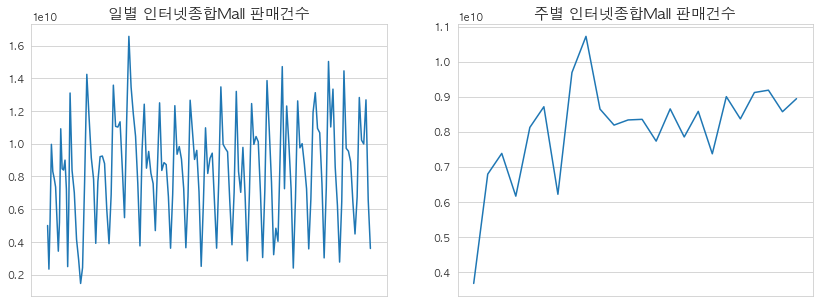

In [131]:
fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].plot(card_compare[card_compare['업종'] == '인터넷종합Mall']['판매금액'])
ax[0].set_title("일별 인터넷종합Mall 판매건수", fontsize=15)
ax[0].set_xticks([])

ax[1].plot(card[card['업종'] == '인터넷종합Mall']['판매금액'])
ax[1].set_title("주별 인터넷종합Mall 판매건수", fontsize=15)
ax[1].set_xticks([])

In [132]:
card_temp = card.copy()

In [135]:
card_temp

,업종,주,판매건수,판매금액
0,1급 호텔,1,0.000000,3.470572e+06
1,1급 호텔,2,0.007883,3.767738e+06
2,1급 호텔,3,0.017736,3.316541e+06
3,1급 호텔,4,0.668919,7.270609e+07
4,1급 호텔,5,0.982264,8.460931e+07
...,...,...,...,...
6235,화방표구점,20,0.867199,1.365857e+07
6236,화방표구점,21,0.960813,1.316717e+07
6237,화방표구점,22,0.879536,1.422516e+07
6238,화방표구점,23,0.972424,1.585964e+07


In [136]:
# 첫 1,2,3 주
front_week = card_temp[(card_temp['주'].isin([1,2,3]))]

In [137]:
front_week

,업종,주,판매건수,판매금액
0,1급 호텔,1,0.000000,3.470572e+06
1,1급 호텔,2,0.007883,3.767738e+06
2,1급 호텔,3,0.017736,3.316541e+06
24,2급 호텔,1,0.000000,9.793000e+05
25,2급 호텔,2,0.041611,6.249858e+06
...,...,...,...,...
6193,화물 운송,2,0.102459,3.056439e+07
6194,화물 운송,3,0.000000,8.739848e+06
6216,화방표구점,1,0.107402,3.585500e+06
6217,화방표구점,2,0.000000,2.506437e+06


In [139]:
# 첫 1,2,3주의 외의 주
behind_week = card_temp[~(card_temp['주'].isin([1,2,3]))]

In [141]:
behind_week

,업종,주,판매건수,판매금액
3,1급 호텔,4,0.668919,7.270609e+07
4,1급 호텔,5,0.982264,8.460931e+07
5,1급 호텔,6,0.873029,1.091284e+08
6,1급 호텔,7,0.820477,4.412815e+07
7,1급 호텔,8,1.000000,5.754877e+07
...,...,...,...,...
6235,화방표구점,20,0.867199,1.365857e+07
6236,화방표구점,21,0.960813,1.316717e+07
6237,화방표구점,22,0.879536,1.422516e+07
6238,화방표구점,23,0.972424,1.585964e+07


In [146]:
k0 = front_week.groupby(['업종']).mean()

In [148]:
k0.head()

,주,판매건수,판매금액
업종,,,
1급 호텔,2,0.008540,3.518284e+06
2급 호텔,2,0.024161,3.145141e+06
CATV,2,0.000000,0.000000e+00
CATV홈쇼핑,2,0.073054,4.163594e+08
L P G,2,0.000000,0.000000e+00


In [149]:
k0 = front_week.groupby(['업종']).mean()['판매건수']

In [152]:
print(k0[1:10])

업종
2급 호텔      0.024161
CATV       0.000000
CATV홈쇼핑    0.073054
L P G      0.000000
P2P송금      0.000000
PG 상품권     0.046399
가   방      0.013631
가전 제품      0.057327
가정용품수리     0.012479
Name: 판매건수, dtype: float64


In [142]:
k1 = front_week.groupby(['업종']).mean()['판매건수'].median()

In [143]:
k1

0.01674187726383731

In [144]:
k2 = behind_week.groupby(['업종']).mean()['판매건수'].median()

In [145]:
k2

0.5805769808646981

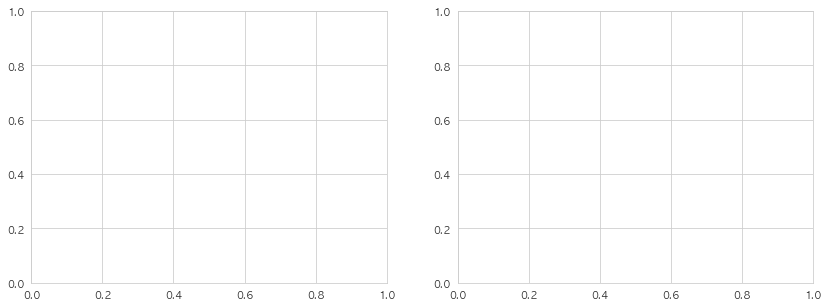

In [ ]:
kind = list(card['업종'].unique())

In [156]:
kind[1:10]

['2급 호텔',
 'CATV',
 'CATV홈쇼핑',
 'L P G',
 'P2P송금',
 'PG 상품권',
 '가   방',
 '가전 제품',
 '가정용품수리']

#### plot parameter
- markeredgewidth or mew	float
- markerfacecolor or mfc	color
- markerfacecoloralt or mfcalt	color
- markersize or ms	float

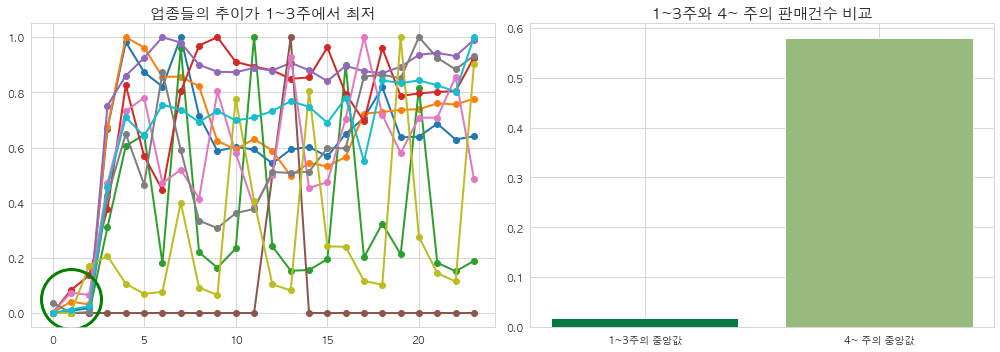

In [163]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
kind = list(card['업종'].unique())
 
for i in range(0, len(set(card_temp['업종']))):
    if i//10 == 0:
        ax[0].plot(np.array(card_temp[card_temp['업종'] == kind[i]]['판매건수']),marker='o', linewidth=2)
ax[0].set_title('업종들의 추이가 1~3주에서 최저', fontsize=15)
ax[0].plot(1, 0.05, 'o', ms=60, mfc='none', color='g', mew=3)
        
x=['1~3주의 중앙값', '4~ 주의 중앙값']
y=[k1,k2]
ax[1].bar(x, y,  color=[pal[1],pal[5]])
ax[1].set_title("1~3주와 4~ 주의 판매건수 비교", fontsize=15)

plt.tight_layout()

- 1~3주의 중앙값 k1 = 0.016
- 4~ 주 의 중앙값 k2 = 0.58
- 이런 결과가 나오기 때문에 1~3주 데이터는 삭제해도 되겠다.

In [166]:
card = card[~card['주'].isin([1,2,3])].reset_index(drop=True)

In [167]:
card

,업종,주,판매건수,판매금액
0,1급 호텔,4,358.428571,7.270609e+07
1,1급 호텔,5,517.428571,8.460931e+07
2,1급 호텔,6,462.000000,1.091284e+08
3,1급 호텔,7,435.333333,4.412815e+07
4,1급 호텔,8,526.428571,5.754877e+07
...,...,...,...,...
5455,화방표구점,20,213.571429,1.365857e+07
5456,화방표구점,21,232.000000,1.316717e+07
5457,화방표구점,22,216.000000,1.422516e+07
5458,화방표구점,23,234.285714,1.585964e+07


In [ ]:
corr = pd.pivot(card, index='주', columns='업종', values='판매건수').corr()